# setup

In [1]:
cd /data/dfried/projects/alfred/alfred

/data/dfried/projects/alfred/alfred


In [2]:
!export ALFRED_ROOT="/data/dfried/projects/alfred/alfred"

In [3]:
import pandas

In [15]:
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

In [5]:
from analysis import *

In [6]:
with open(SPLITS) as f:
    splits = json.load(f)

In [7]:
train = splits['train']

In [9]:
def extract_pddl_actions(task_data):
    high_pddl = task_data['plan']['high_pddl']
    return [
        action['discrete_action'] for action in high_pddl
    ]

In [11]:
import tqdm.notebook

In [29]:
all_actions = []
all_actions_flat = []
for task in tqdm.notebook.tqdm(train):
    data = load_task_json(task)
    task_description = task['task'].split('/')[0].split('-')
    scene = task_description[-1]
    high_level_task = task_description[0]
    high_level_params = task_description[1:-1]
    task_data = {
        'scene': scene,
        'high_level_task': high_level_task,
        'high_level_params': high_level_params,
        'high_level_task_and_params': task_description[:-1],
        'repeat_idx': task['repeat_idx']
    }
    
    repeated_idx = task['repeat_idx']
    actions = extract_pddl_actions(data)
    all_actions.append(actions)
    
    task_data['num_high_level_actions'] = len(actions)
    task_data['num_low_level_actions'] = len(data['plan']['low_actions'])
    
    for action in actions:
        this_data = {k: tuple(v) if isinstance(v, list) else v for k, v in {
            **action,
            **task_data
        }.items()}
        this_data['action_and_args'] = (this_data['action'],) + this_data['args']
        all_actions_flat.append(this_data)

In [30]:
train_df = pandas.DataFrame(all_actions_flat)

In [31]:
train_df

,action,args,scene,high_level_task,high_level_params,high_level_task_and_params,repeat_idx,num_high_level_actions,num_low_level_actions,action_and_args
0,GotoLocation,"(diningtable,)",17,pick_cool_then_place_in_recep,"(LettuceSliced, None, DiningTable)","(pick_cool_then_place_in_recep, LettuceSliced,...",0,12,67,"(GotoLocation, diningtable)"
1,PickupObject,"(knife,)",17,pick_cool_then_place_in_recep,"(LettuceSliced, None, DiningTable)","(pick_cool_then_place_in_recep, LettuceSliced,...",0,12,67,"(PickupObject, knife)"
2,SliceObject,"(lettuce,)",17,pick_cool_then_place_in_recep,"(LettuceSliced, None, DiningTable)","(pick_cool_then_place_in_recep, LettuceSliced,...",0,12,67,"(SliceObject, lettuce)"
3,GotoLocation,"(fridge,)",17,pick_cool_then_place_in_recep,"(LettuceSliced, None, DiningTable)","(pick_cool_then_place_in_recep, LettuceSliced,...",0,12,67,"(GotoLocation, fridge)"
4,PutObject,"(knife, fridge)",17,pick_cool_then_place_in_recep,"(LettuceSliced, None, DiningTable)","(pick_cool_then_place_in_recep, LettuceSliced,...",0,12,67,"(PutObject, knife, fridge)"
...,...,...,...,...,...,...,...,...,...,...
162301,GotoLocation,"(sinkbasin,)",411,pick_clean_then_place_in_recep,"(Cloth, None, Drawer)","(pick_clean_then_place_in_recep, Cloth, None, ...",2,7,27,"(GotoLocation, sinkbasin)"
162302,CleanObject,"(cloth,)",411,pick_clean_then_place_in_recep,"(Cloth, None, Drawer)","(pick_clean_then_place_in_recep, Cloth, None, ...",2,7,27,"(CleanObject, cloth)"
162303,GotoLocation,"(drawer,)",411,pick_clean_then_place_in_recep,"(Cloth, None, Drawer)","(pick_clean_then_place_in_recep, Cloth, None, ...",2,7,27,"(GotoLocation, drawer)"
162304,PutObject,"(cloth, drawer)",411,pick_clean_then_place_in_recep,"(Cloth, None, Drawer)","(pick_clean_then_place_in_recep, Cloth, None, ...",2,7,27,"(PutObject, cloth, drawer)"


# object / receptacle arguments

In [39]:
from collections import Counter, defaultdict

In [40]:
Counter(train_df['high_level_task_and_params']).most_common()

[(('pick_heat_then_place_in_recep', 'Mug', 'None', 'CoffeeMachine'), 1400),
 (('pick_cool_then_place_in_recep', 'Mug', 'None', 'CoffeeMachine'), 1281),
 (('pick_heat_then_place_in_recep', 'PotatoSliced', 'None', 'Fridge'), 1044),
 (('pick_heat_then_place_in_recep', 'BreadSliced', 'None', 'Fridge'), 999),
 (('pick_cool_then_place_in_recep', 'AppleSliced', 'None', 'Microwave'), 996),
 (('pick_heat_then_place_in_recep', 'BreadSliced', 'None', 'GarbageCan'), 985),
 (('pick_cool_then_place_in_recep', 'BreadSliced', 'None', 'Microwave'), 951),
 (('pick_heat_then_place_in_recep', 'TomatoSliced', 'None', 'GarbageCan'),
  918),
 (('pick_heat_then_place_in_recep', 'AppleSliced', 'None', 'Fridge'), 893),
 (('pick_heat_then_place_in_recep', 'PotatoSliced', 'None', 'SinkBasin'), 891),
 (('pick_two_obj_and_place', 'CreditCard', 'None', 'ArmChair'), 873),
 (('pick_heat_then_place_in_recep', 'BreadSliced', 'None', 'CounterTop'), 855),
 (('look_at_obj_in_light', 'CreditCard', 'None', 'FloorLamp'), 840)

In [41]:
parameters_by_task = defaultdict(Counter)
for ix, row in train_df.iterrows():
    hlt = row['high_level_task']
    parameters_by_task[hlt][row['high_level_params']] += 1

In [42]:
TASKS = list(parameters_by_task.keys())

In [43]:
parameters_by_task['pick_and_place_simple']

Counter({('KeyChain', 'None', 'Sofa'): 210,
         ('AlarmClock', 'None', 'Desk'): 185,
         ('Box', 'None', 'Desk'): 45,
         ('CreditCard', 'None', 'Sofa'): 120,
         ('CellPhone', 'None', 'Safe'): 90,
         ('SprayBottle', 'None', 'GarbageCan'): 270,
         ('Pen', 'None', 'Shelf'): 120,
         ('Spoon', 'None', 'SinkBasin'): 100,
         ('Vase', 'None', 'Safe'): 45,
         ('ToiletPaper', 'None', 'Drawer'): 45,
         ('KeyChain', 'None', 'Desk'): 90,
         ('AlarmClock', 'None', 'Shelf'): 105,
         ('TissueBox', 'None', 'Dresser'): 45,
         ('Candle', 'None', 'Toilet'): 435,
         ('PepperShaker', 'None', 'CounterTop'): 45,
         ('SoapBottle', 'None', 'Toilet'): 375,
         ('CD', 'None', 'SideTable'): 105,
         ('ButterKnife', 'None', 'Drawer'): 45,
         ('SoapBottle', 'None', 'GarbageCan'): 285,
         ('Cloth', 'None', 'CounterTop'): 39,
         ('Pencil', 'None', 'Dresser'): 30,
         ('CellPhone', 'None', 'Bed'): 18

In [44]:
def project(counter, arg_index):
    c = Counter()
    for args, count in counter.items():
        c[args[arg_index]] += count
    return c

In [45]:
parameters_by_task.keys()

dict_keys(['pick_cool_then_place_in_recep', 'pick_two_obj_and_place', 'pick_heat_then_place_in_recep', 'pick_clean_then_place_in_recep', 'pick_and_place_simple', 'pick_and_place_with_movable_recep', 'look_at_obj_in_light'])

In [46]:
pandp_objs = project(parameters_by_task['pick_and_place_simple'], 0)
pandp_receps = project(parameters_by_task['pick_and_place_simple'], 2)

In [47]:
pandp_2_objs = project(parameters_by_task['pick_two_obj_and_place'], 0)
pandp_2_receps = project(parameters_by_task['pick_two_obj_and_place'], 2)

In [48]:
for task, parameters in parameters_by_task.items():
    for arg_idx in range(3):
        projected = project(parameters, arg_idx)
        print("{} {} {}".format(task, arg_idx, projected.most_common()[0]))

pick_cool_then_place_in_recep 0 ('LettuceSliced', 2585)
pick_cool_then_place_in_recep 1 ('None', 25205)
pick_cool_then_place_in_recep 2 ('Microwave', 5498)
pick_two_obj_and_place 0 ('SprayBottle', 1827)
pick_two_obj_and_place 1 ('None', 32538)
pick_two_obj_and_place 2 ('Drawer', 4149)
pick_heat_then_place_in_recep 0 ('PotatoSliced', 4031)
pick_heat_then_place_in_recep 1 ('None', 27091)
pick_heat_then_place_in_recep 2 ('Fridge', 6114)
pick_clean_then_place_in_recep 0 ('SoapBar', 3025)
pick_clean_then_place_in_recep 1 ('None', 21577)
pick_clean_then_place_in_recep 2 ('CounterTop', 2916)
pick_and_place_simple 0 ('ToiletPaper', 1035)
pick_and_place_simple 1 ('None', 16376)
pick_and_place_simple 2 ('Toilet', 1590)
pick_and_place_with_movable_recep 0 ('ButterKnife', 2689)
pick_and_place_with_movable_recep 1 ('Plate', 4822)
pick_and_place_with_movable_recep 2 ('DiningTable', 6141)
look_at_obj_in_light 0 ('CreditCard', 975)
look_at_obj_in_light 1 ('None', 11183)
look_at_obj_in_light 2 ('DeskLa

In [49]:
def display_jaccard(set1, set2):
    num = len(set1 & set2)
    denom = len(set1 | set2)
    print("\tin 1st       : {}".format(len(set1)))
    print("\tin 1st \\ 2nd : {}".format(len(set1 - set2)))
    print("\tin 2nd       : {}".format(len(set2)))
    print("\tin 2nd \\ 1st : {}".format(len(set2 - set1)))
    print("\tjaccard\t{} / {} = {:.2f}".format(num, denom, float(num) / denom))

In [50]:
def compare_tasks(task_1, task_2):
    params_1 = parameters_by_task[task_1]
    params_2 = parameters_by_task[task_2]
    print("{} vs {}".format(task_1, task_2))
    print("\tobject jaccard:")
    display_jaccard(set(project(params_1, 0)), set(project(params_2, 0)))
    print()
    print("\treceptacle jaccard:")
    display_jaccard(set(project(params_1, 2)), set(project(params_2, 2)))
    print()
    return params_1, params_2

In [51]:
params_1, params_2 = compare_tasks("pick_and_place_simple", "pick_two_obj_and_place")

pick_and_place_simple vs pick_two_obj_and_place
	object jaccard:
	in 1st       : 56
	in 1st \ 2nd : 3
	in 2nd       : 55
	in 2nd \ 1st : 2
	jaccard	53 / 58 = 0.91

	receptacle jaccard:
	in 1st       : 23
	in 1st \ 2nd : 2
	in 2nd       : 21
	in 2nd \ 1st : 0
	jaccard	21 / 23 = 0.91



In [52]:
TASKS

['pick_cool_then_place_in_recep',
 'pick_two_obj_and_place',
 'pick_heat_then_place_in_recep',
 'pick_clean_then_place_in_recep',
 'pick_and_place_simple',
 'pick_and_place_with_movable_recep',
 'look_at_obj_in_light']

In [53]:
reference_task = 'pick_and_place_simple'

In [54]:
for task in TASKS:
    if task == reference_task:
        continue
    compare_tasks(reference_task, task)

pick_and_place_simple vs pick_cool_then_place_in_recep
	object jaccard:
	in 1st       : 56
	in 1st \ 2nd : 39
	in 2nd       : 18
	in 2nd \ 1st : 1
	jaccard	17 / 57 = 0.30

	receptacle jaccard:
	in 1st       : 23
	in 1st \ 2nd : 14
	in 2nd       : 10
	in 2nd \ 1st : 1
	jaccard	9 / 24 = 0.38

pick_and_place_simple vs pick_two_obj_and_place
	object jaccard:
	in 1st       : 56
	in 1st \ 2nd : 3
	in 2nd       : 55
	in 2nd \ 1st : 2
	jaccard	53 / 58 = 0.91

	receptacle jaccard:
	in 1st       : 23
	in 1st \ 2nd : 2
	in 2nd       : 21
	in 2nd \ 1st : 0
	jaccard	21 / 23 = 0.91

pick_and_place_simple vs pick_heat_then_place_in_recep
	object jaccard:
	in 1st       : 56
	in 1st \ 2nd : 45
	in 2nd       : 12
	in 2nd \ 1st : 1
	jaccard	11 / 57 = 0.19

	receptacle jaccard:
	in 1st       : 23
	in 1st \ 2nd : 15
	in 2nd       : 9
	in 2nd \ 1st : 1
	jaccard	8 / 24 = 0.33

pick_and_place_simple vs pick_clean_then_place_in_recep
	object jaccard:
	in 1st       : 56
	in 1st \ 2nd : 33
	in 2nd       : 25
	in

# number of high-level actions

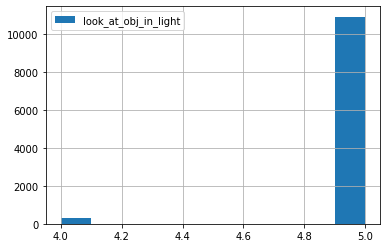

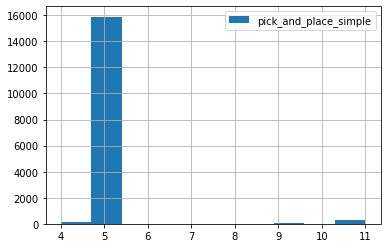

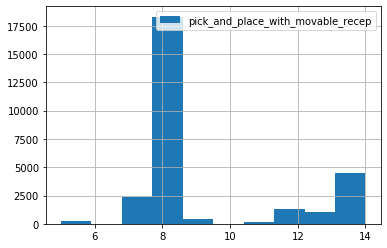

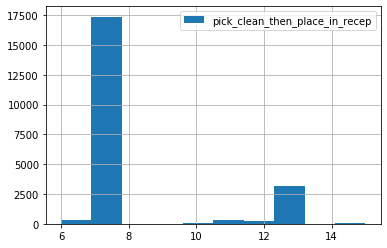

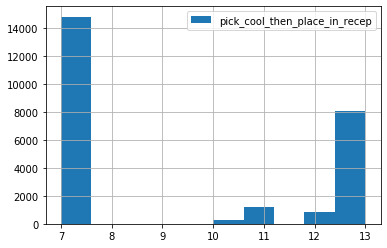

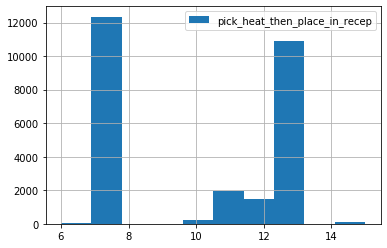

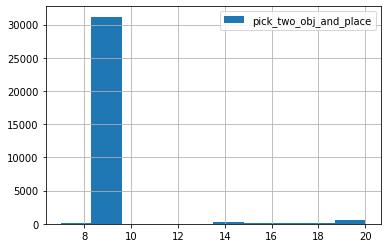

In [34]:
for group, series in train_df.groupby('high_level_task'):
#     series.num_actions.hist(range=(0,20),label=group)
    series['num_high_level_actions'].hist(label=group)
    plt.legend()
    plt.show()

# number of low-level actions

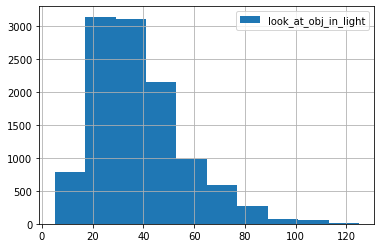

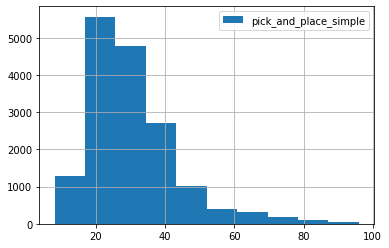

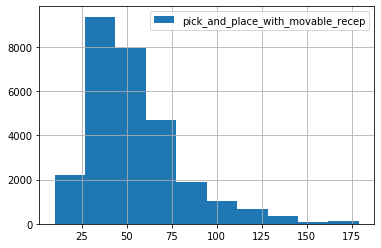

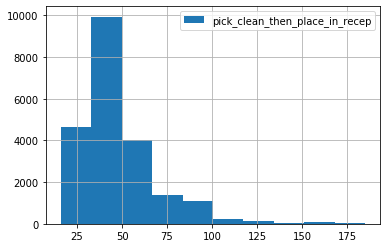

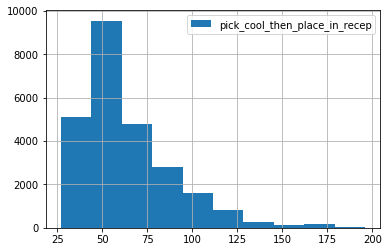

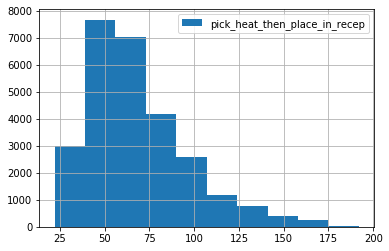

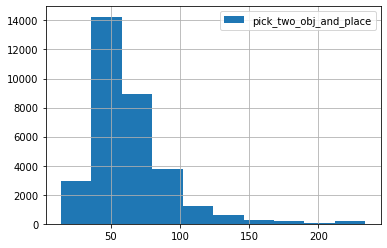

In [35]:
for group, series in train_df.groupby('high_level_task'):
#     series.num_actions.hist(range=(0,20),label=group)
    series['num_low_level_actions'].hist(label=group)
    plt.legend()
    plt.show()